In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

# Data 

In [6]:
# read data
df = pd.read_csv("heart_toy_sample.csv", index_col=0)
X_sample = df.drop(columns='target')
y_sample = df.target

In [7]:
X_sample.head()

,chest_pain_bool,trestbps,chol
0,1,160,273
1,0,120,219
2,1,140,335
3,0,128,216
4,1,125,254


# Decision Tree

In [8]:
# fit tree
clf = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=3,
                             min_samples_split=2)
clf.fit(X_sample, y_sample)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

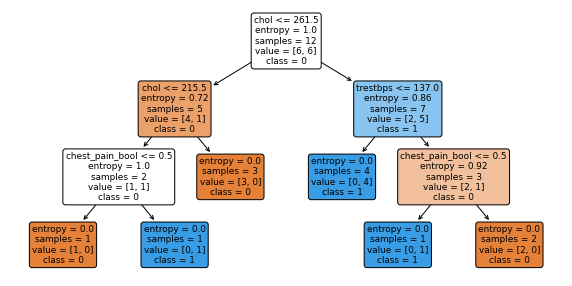

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
dot_data  = plot_tree(clf, 
                    feature_names = X_sample.columns,
                    class_names = ["0","1"],
                    rounded = True, proportion = False, impurity = True,
                    label='all', precision = 2, filled = True) 

# Feature Importance

In [10]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X = df.drop(['target'], axis = 1)
y = df.target

Feature ranking:
1. cp (20.24%)
2. chol (16.83%)
3. ca (13.30%)
4. age (9.27%)
5. thal (8.67%)
6. oldpeak (6.88%)
7. thalach (6.70%)
8. sex (5.82%)
9. trestbps (5.37%)
10. slope (3.17%)
11. exang (2.02%)
12. restecg (1.72%)
13. fbs (0.00%)


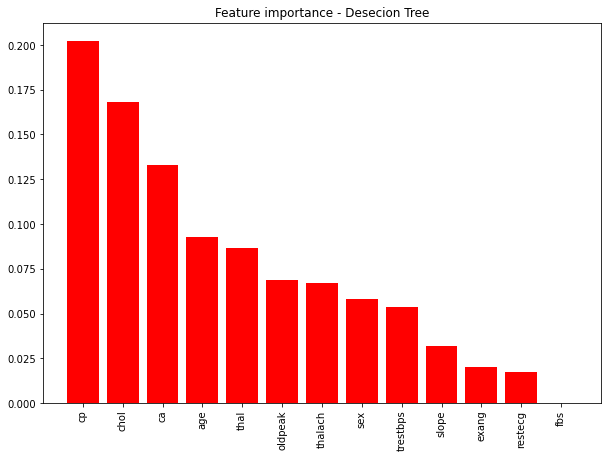

In [12]:
# Create a Decision tree classifier
tree = DecisionTreeClassifier(criterion= 'entropy', splitter='best', max_depth=20, min_samples_split=2)

# Train the classifier
tree = tree.fit(X, y)

# Get the feature's importance
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, feature in enumerate(X.columns[indices]):
    print(("{}. {} ({:.2f}%)").format(i+1, feature, importances[indices][i]*100))
    
# Plot the feature importances
plt.figure(figsize=(10,7))
plt.title('Feature importance - Desecion Tree')
#plt.title('Feature importances')
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()